In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.6,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,266.554,8.3,17776,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,91.055,7.5,23164,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,76.323,7.9,18970,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,51.502,7.4,15668,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en']


In [3]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



In [4]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month
Movie_CleanedData.head(100)

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,Profit,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage,Year,Month
0,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000.0,266.554,8.3,17776.0,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2.797801e+09,2.441801e+09,2019-04-24,181.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']",2019,4
1,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000.0,91.055,7.5,23164.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2.787965e+09,2.550965e+09,2009-12-10,162.0,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']",2009,12
2,Titanic,False,"['Drama', 'Romance']",200000000.0,76.323,7.9,18970.0,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2.187464e+09,1.987464e+09,1997-11-18,194.0,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']",1997,11
3,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000.0,51.502,7.4,15668.0,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2.068224e+09,1.823224e+09,2015-12-15,136.0,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en'],2015,12
4,Avengers: Infinity War,False,"['Adventure', 'Action', 'Science Fiction']",300000000.0,283.248,8.3,21470.0,As the Avengers and their allies have continue...,An entire universe. Once and for all.,2.046240e+09,1.746240e+09,2018-04-25,149.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'xh']",2018,4
5,Jurassic World,False,"['Action', 'Adventure', 'Science Fiction', 'Th...",150000000.0,68.575,6.6,16686.0,Twenty-two years after the events of Jurassic ...,The park is open.,1.671713e+09,1.521713e+09,2015-06-06,124.0,en,"[['Amblin Entertainment', 'US'], ['Legendary P...",['US'],['en'],2015,6
6,The Lion King,False,"['Adventure', 'Family', 'Animation']",260000000.0,94.877,7.2,7563.0,"Simba idolizes his father, King Mufasa, and ta...",The King has Returned.,1.656943e+09,1.396943e+09,2019-07-12,118.0,en,"[['Walt Disney Pictures', 'US'], ['Fairview En...",['US'],['en'],2019,7
7,The Avengers,False,"['Science Fiction', 'Action', 'Adventure']",220000000.0,139.977,7.7,24419.0,When an unexpected enemy emerges and threatens...,Some assembly required.,1.518816e+09,1.298816e+09,2012-04-25,143.0,en,"[['Marvel Studios', 'US'], ['Paramount', 'US']]",['US'],"['en', 'hi', 'ru']",2012,4
8,Furious 7,False,"['Action', 'Thriller']",190000000.0,73.657,7.3,8239.0,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,1.515048e+09,1.325048e+09,2015-04-01,137.0,en,"[['Abu Dhabi Film Commission', ''], ['Universa...",['US'],['en'],2015,4
9,Frozen II,False,"['Family', 'Animation', 'Adventure', 'Comedy',...",150000000.0,154.917,7.3,7232.0,"Elsa, Anna, Kristoff and Olaf head far into th...",The past is not what it seems.,1.450027e+09,1.300027e+09,2019-11-20,103.0,en,"[['Walt Disney Pictures', 'US'], ['Walt Disney...",['US'],['en'],2019,11


In [6]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

In [13]:
Movie_CleanedData.head()

,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,Profit,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage,Year,Month
Movie_name,,,,,,,,,,,,,,,,,,
Avengers: Endgame,False,"[Adventure, Science Fiction, Action]",356000000.0,266.554,8.3,17776.0,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2.797801e+09,2.441801e+09,2019-04-24,181.0,en,"[[Marvel Studios, US]]",[US],"[en, ja, xh]",2019,4
Avatar,False,"[Action, Adventure, Fantasy, Science Fiction]",237000000.0,91.055,7.5,23164.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2.787965e+09,2.550965e+09,2009-12-10,162.0,en,"[[Dune Entertainment, US], [Lightstorm Enterta...","[US, GB]","[en, es]",2009,12
Titanic,False,"[Drama, Romance]",200000000.0,76.323,7.9,18970.0,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2.187464e+09,1.987464e+09,1997-11-18,194.0,en,"[[Paramount, US], [Lightstorm Entertainment, U...",[US],"[en, fr, de, sv, it, ru]",1997,11
Star Wars: The Force Awakens,False,"[Action, Adventure, Science Fiction, Fantasy]",245000000.0,51.502,7.4,15668.0,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2.068224e+09,1.823224e+09,2015-12-15,136.0,en,"[[Lucasfilm Ltd., US], [Bad Robot, US]]",[US],[en],2015,12
Avengers: Infinity War,False,"[Adventure, Action, Science Fiction]",300000000.0,283.248,8.3,21470.0,As the Avengers and their allies have continue...,An entire universe. Once and for all.,2.046240e+09,1.746240e+09,2018-04-25,149.0,en,"[[Marvel Studios, US]]",[US],"[en, xh]",2018,4


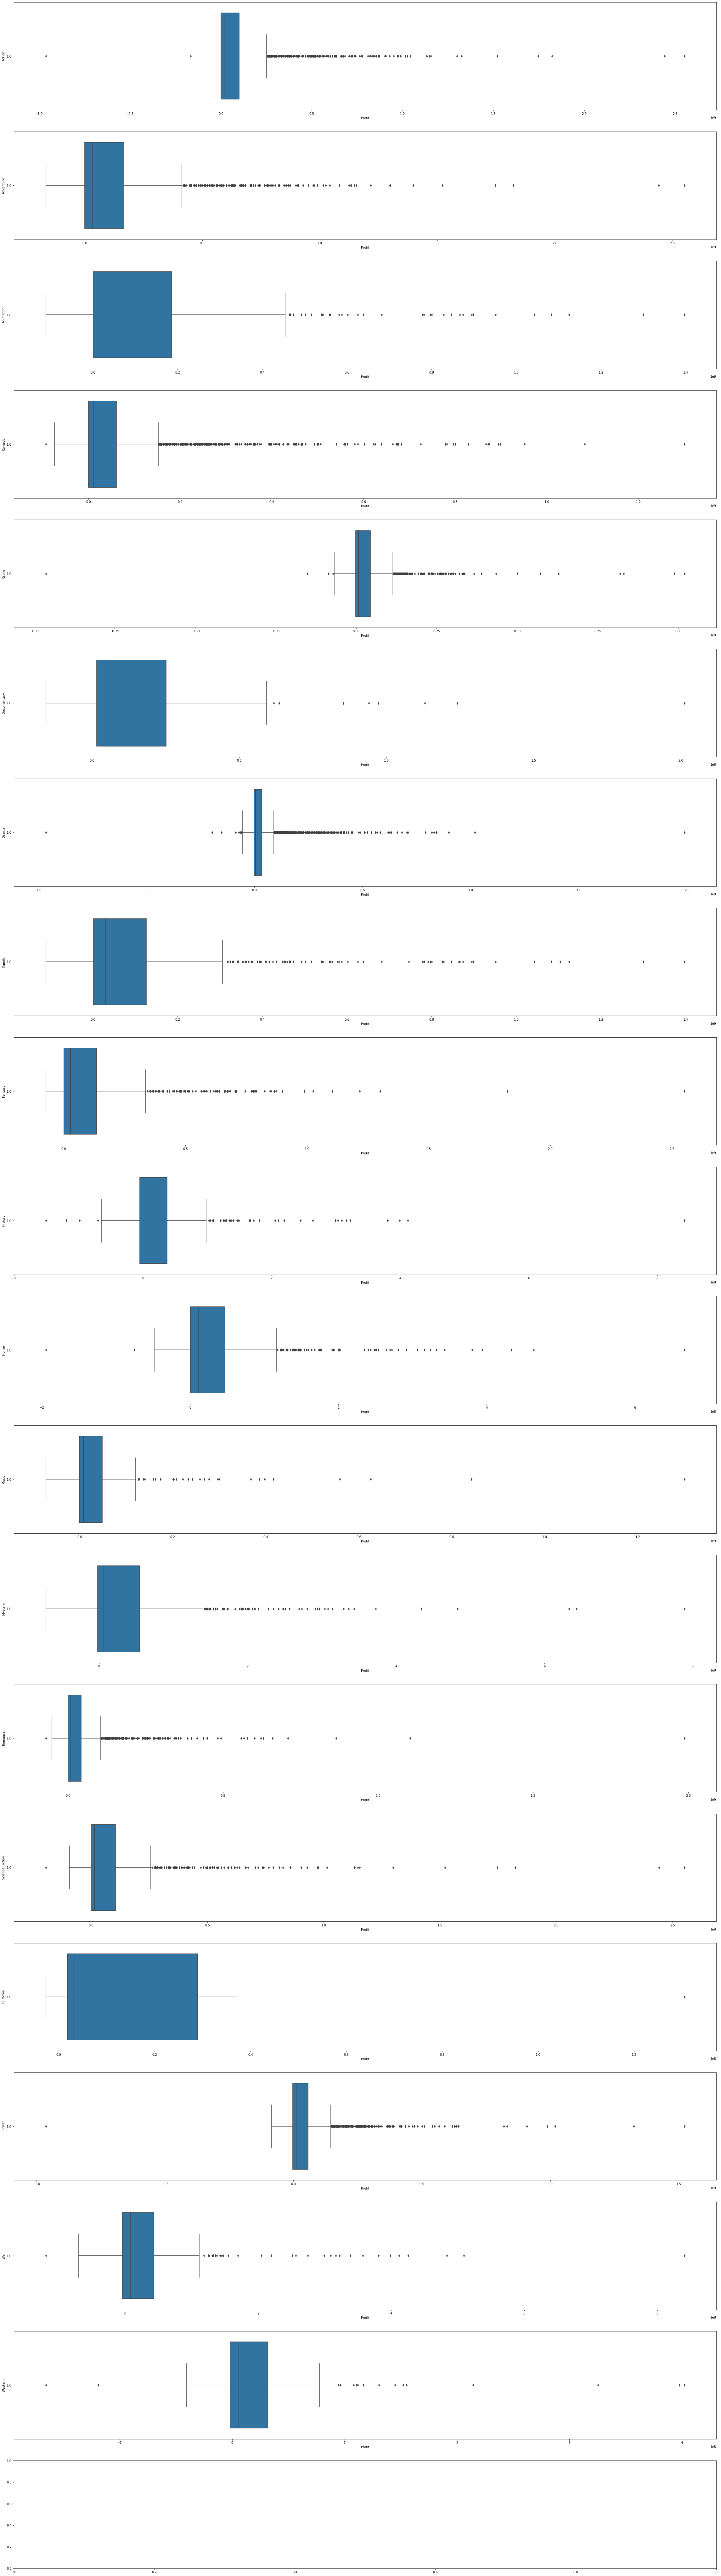

In [8]:
f, axes = plt.subplots(len(Genre.columns)-1, 1, figsize=(40, 150))
count = 0
for var in Genre.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = Genre[var], x = Genre['Profit'], orient = "h", ax = axes[count])
    count+=1

In [48]:
df = Genre.melt(id_vars=['Year',"Profit"], var_name="Genre",value_name="Value")
df = df.sample(frac=0.25,axis='rows')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31858 entries, 104599 to 111523
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    31858 non-null  int64  
 1   Profit  31858 non-null  float64
 2   Genre   31858 non-null  object 
 3   Value   4318 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ MB


In [85]:
# f, ax = plt.subplots(figsize=(10, 10))
# sb.scatterplot(x=df['Year'],y=df['Profit'],hue=df['Genre'], size = df["Profit"],
#                 sizes=(1,100), palette="bright", ax = ax)
#still useful, different way of plotting scatterplot

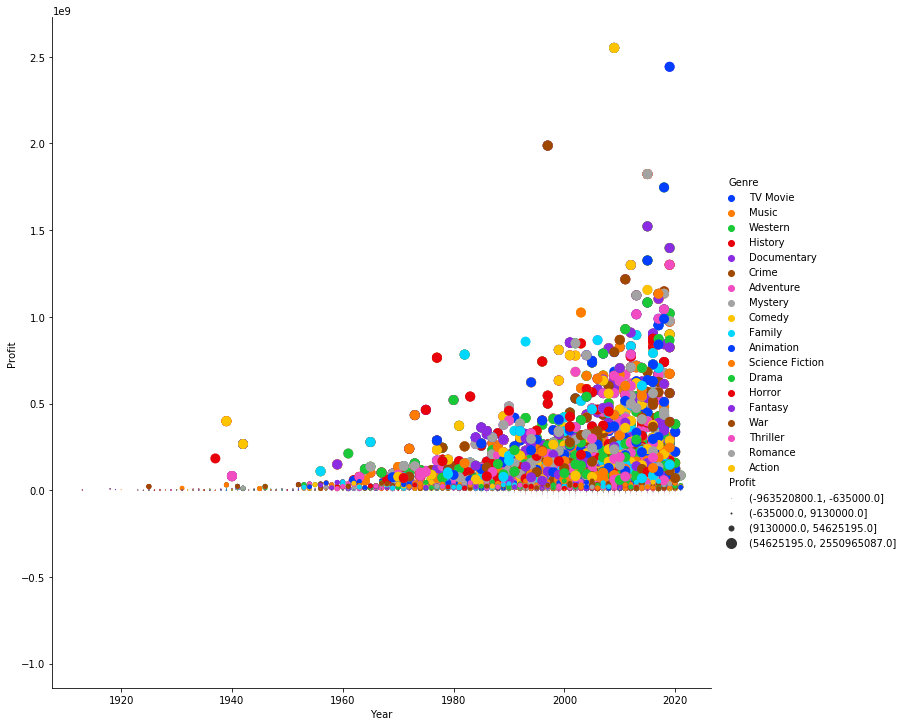

In [94]:
sb.relplot(x=df['Year'],y=df['Profit'],hue=df['Genre'], size = pd.qcut(df["Profit"], 4, precision=1),
                sizes=[0.01, 1, 25, 100], palette="bright", height = 10)


In [ ]:
# df = Genre.set_index('Year')[['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western','Profit']].apply(pd.Series).stack()
# df = pd.DataFrame(df.sort_index())
# df.value_counts()
# df.head(10000)

# import matplotlib.cm as cm

# colors = cm.rainbow(np.linspace(0,1,20))

# f, axes = plt.subplots(1, 1, figsize=(40, 40))
# i = 0
# # for var in Genre.columns:
# #     if var == 'Profit':
# #         break
# sb.scatterplot(x='Year',y='Profit',hue=['Genre'], figsize=10,5,grid=True)
# #     print(colors[i])
# #     i+=1